# Comparison of Classification Algorithms in Heart Disease Prediction
### CSC511 Fall 2021 Term Project
#### Jennifer Kawakami and Rudy Perez

# Data Preprocessing
In this file, the Heart Disease Prediction CSV files will be
preprocessed for the machine learning classification algorithms.

### Import Statements
We use Pandas to process CSV Files, Numpy to process the data arrays and matrices

In [1]:
import pandas as pd
import numpy as np

from matplotlib import pyplot as plt

# Scikit-Learn libraries
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, OrdinalEncoder

## Read CSV File

In [2]:
df = pd.read_csv('heart.csv')

# Display Dataset
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [42]:
df.shape

(918, 20)

## Visualizing the Data


Text(0.5, 1.0, 'Age')

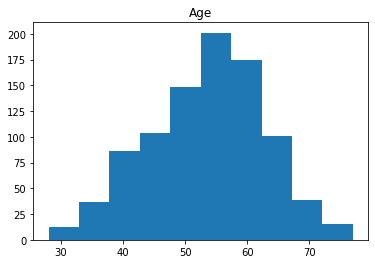

In [3]:
# Age
df['Age'].hist(grid=False)
plt.title('Age')

Text(0.5, 1.0, 'Patient Sex')

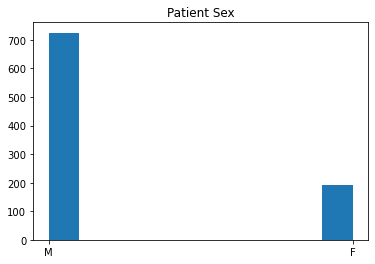

In [4]:
# Sex
df['Sex'].hist(grid=False)
plt.title('Patient Sex')

Text(0.5, 1.0, 'Chest Pain Type')

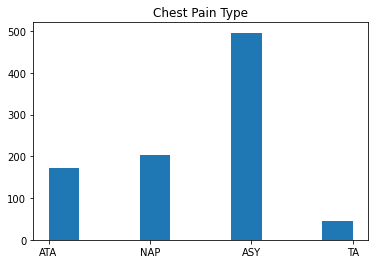

In [5]:
# Chest Pain Type
df['ChestPainType'].hist(grid=False)
plt.title('Chest Pain Type')

Text(0.5, 1.0, 'Resting Blood Pressure')

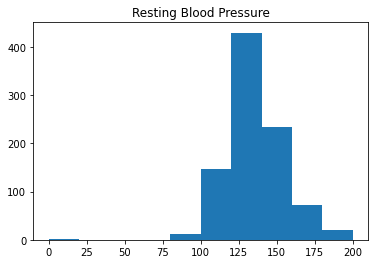

In [6]:
# Resting BP
df['RestingBP'].hist(grid=False)
plt.title('Resting Blood Pressure')

Text(0.5, 1.0, 'Cholesterol')

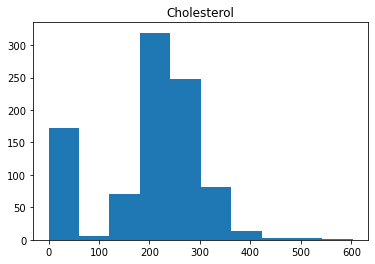

In [7]:
# Cholesterol
df['Cholesterol'].hist(grid=False)
plt.title('Cholesterol')

### Cholesterol: Replace Missing Values w/ Mean 
Because there are several missing values for Cholesterol, these will be replaced with the mean of the Cholesterol dataset.

In [8]:
df['Cholesterol'].replace(0, np.nan, inplace=True)
df['Cholesterol'].fillna(df['Cholesterol'].mean(), inplace = True)

Text(0.5, 1.0, 'Cholesterol (Imputed)')

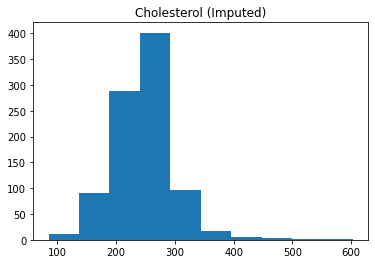

In [9]:
df['Cholesterol'].hist(grid=False)
plt.title('Cholesterol (Imputed)')

Text(0.5, 1.0, 'Maximum Heart Rate')

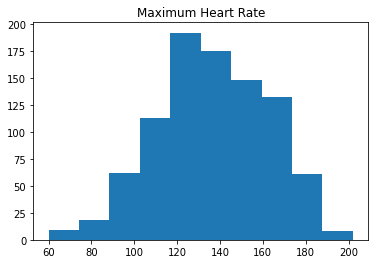

In [10]:
# Maximum HR
df['MaxHR'].hist(grid=False)
plt.title('Maximum Heart Rate')

Text(0.5, 1.0, 'Exercise Angina')

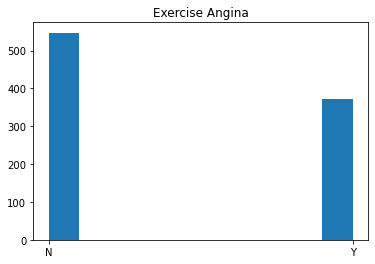

In [11]:
# Exercise Angina
df['ExerciseAngina'].hist(grid=False)
plt.title('Exercise Angina')

Text(0.5, 1.0, 'Oldpeak ST Depression')

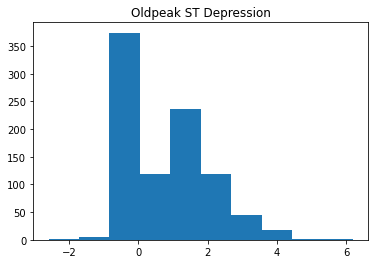

In [12]:
# Oldpeak ST Depression
df['Oldpeak'].hist(grid=False)
plt.title('Oldpeak ST Depression')

Text(0.5, 1.0, 'ST Slope')

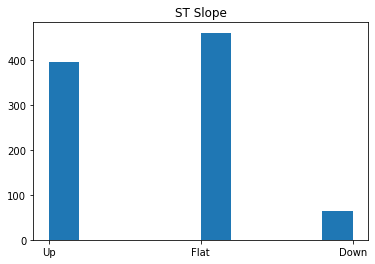

In [14]:
# ST Slope
df['ST_Slope'].hist(grid=False)
plt.title('ST Slope')

### Validation Data (Heart Disease)

Text(0.5, 1.0, 'Heart Disease')

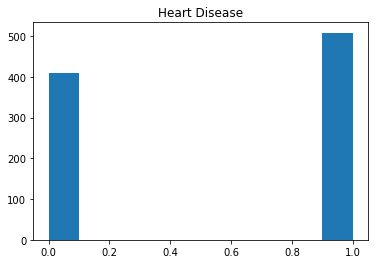

In [15]:
# Heart Disease
df['HeartDisease'].hist(grid=False)
plt.title('Heart Disease')

## Define Bins for Attributes
When measuring Blood Pressure, Cholesterol, etc, there are certain ranges in measurement that are used to indicate healthy versus unhealthy conditions. Binning these attributes helps ensure faster learning for the machine learning model.

### Chest Pain Types
Chest pain type will be categorized as whether chest pain comes from the heart or not.

In this case, 'No Anginal Pain' ('NAP') and 'Asymptomatic' ('ASY') will be considered Chest Pain Not from the Heart ('N').

This means cases such as 'Typical Angina' ('TA') and 'Atypical Angina' ('ATA') are both Chest Pain From the Heart ('Y').

In [16]:
# Chest Pain Types
df['chest_pain_from_heart'] = np.where(df.ChestPainType.isin(['NAP','ASY']), 'N', 'Y')

Text(0.5, 1.0, 'Chest Pain from Heart')

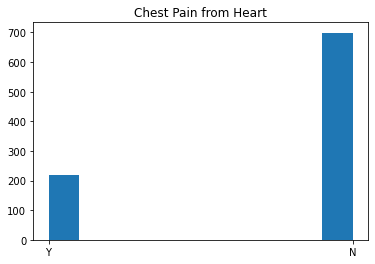

In [17]:
df['chest_pain_from_heart'].hist(grid=False)
plt.title('Chest Pain from Heart')

### Blood Pressure (mm Hg)
Blood Pressure ranges are as follows:

BP < 120 : Optimal

BP >= 120 and < 140: Normal

BP >= 140: Hypertension (High BP)

In [18]:
# Resting Blood Pressure Readings
bp_conditions = [df['RestingBP'] < 120,
                  (df['RestingBP'] >=120) & (df['RestingBP'] < 140),
                  df['RestingBP'] >=140]

bp_categories = ['optimal', 'normal', 'hypertension']

df['bp_ranges'] = np.select(bp_conditions, bp_categories, default=np.nan)

Text(0.5, 1.0, 'Blood Pressure')

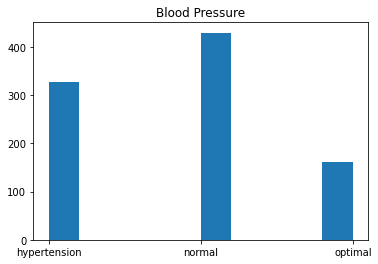

In [19]:
df['bp_ranges'].hist(grid=False)
plt.title('Blood Pressure')

### Cholesterol (mm/dl)
Cholesterol Ranges are as follows: 

CH < 200: Optimal

CH >=200 and <240: Normal

CH >= 240 = High Cholesterol

In [20]:
# Cholesterol
ch_conditions = [(df['Cholesterol'] < 200) & (df['Cholesterol'] > 0),
                 (df['Cholesterol'] >= 200) & (df['Cholesterol'] < 240),
                 df['Cholesterol'] >= 240]

ch_categories = ['optimal', 'borderline', 'high']

df['ch_ranges'] = np.select(ch_conditions, ch_categories, default=np.nan)

Text(0.5, 1.0, 'Cholesterol Range')

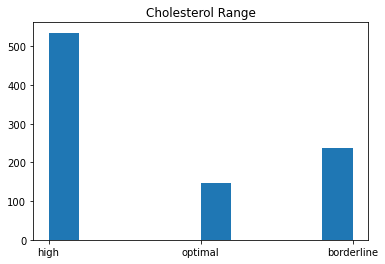

In [21]:
df['ch_ranges'].hist(grid=False)
plt.title('Cholesterol Range')

### Maximum Heart Rate
According to the CDC, the estimated Maximum Age-Related Heart Rate is calculated as follows:

220 - Age = Optimal Heart Rate (BPM)

The Optimal Maximum Heart Rate of each patient is calculated and is then categorized as either at or below optimal heart rate ('Normal'), or above optimal heart rate ('High')

In [22]:
# Maximum Heart Rate 
df['optimal_max_hr'] = 220 - df['Age']
df['hr_ranges'] = np.where(df.optimal_max_hr > df.MaxHR, 'normal', 'high')

Text(0.5, 1.0, 'Maximum Heart Rate')

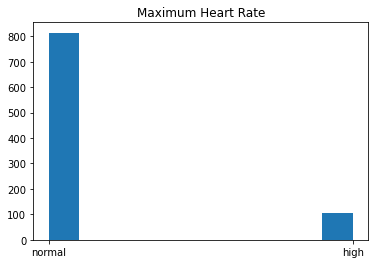

In [23]:
df['hr_ranges'].hist(grid=False)
plt.title('Maximum Heart Rate')

### Oldpeak ST Depression
Oldpeak ST Depression values are defined as follows:

Values < 0.5 are 'Normal'; Otherwise, it is 'Abnormal'

In [24]:
# oldpeak ST Segment
df['op_ranges'] = np.where(df.Oldpeak < 0.5, 'normal', 'abnormal')

Text(0.5, 1.0, 'Oldpeak ST Depression State')

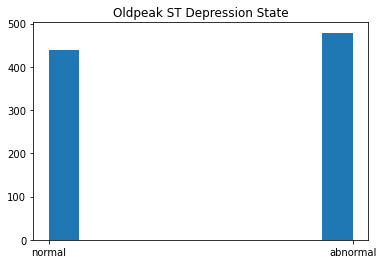

In [38]:
df['op_ranges'].hist(grid=False)
plt.title('Oldpeak ST Depression State')

### ST Slope
ST Slope, the slope of the peak exercise ST Segment, is defined as follows:

Upsloping ('Up') is Normal; Flat ('Flat') and Downsloping ('Down') is considered Abnormal

In [25]:
# ST Slope
df['st_ranges'] = np.where(df.ST_Slope == 'Up', 'normal', 'abnormal')

Text(0.5, 1.0, 'ST Slope state')

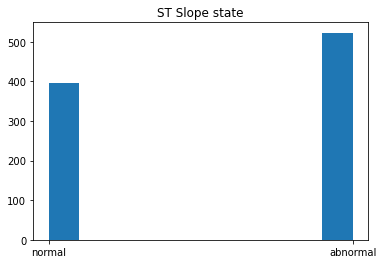

In [39]:
df['st_ranges'].hist(grid=False)
plt.title('ST Slope state')

### Age Ranges
Age ranges are defined as follows: 25-44, 45-64, 65-85

In [26]:
# Age Ranges 

age_bins = [25, 45, 65, 85]
df['age_binned'] = pd.cut(df['Age'], age_bins)

### Diabetic
The Dataset is written so that '1' = Fasting Blood Sugar is >120 mg/dl ('diabetic'); '0' indicates otherwise. Therefore, it is appropriate to rename the attribute to indicate True/False to 'Diabetic'

In [27]:
# Fasting Blood Sugar / Diabetes
df.rename(columns={'FastingBS' : 'diabetic'}, inplace=True)

In [28]:
# Display Values
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,diabetic,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease,chest_pain_from_heart,bp_ranges,ch_ranges,optimal_max_hr,hr_ranges,op_ranges,st_ranges,age_binned
0,40,M,ATA,140,289.0,0,Normal,172,N,0.0,Up,0,Y,hypertension,high,180,normal,normal,normal,"(25, 45]"
1,49,F,NAP,160,180.0,0,Normal,156,N,1.0,Flat,1,N,hypertension,optimal,171,normal,abnormal,abnormal,"(45, 65]"
2,37,M,ATA,130,283.0,0,ST,98,N,0.0,Up,0,Y,normal,high,183,normal,normal,normal,"(25, 45]"
3,48,F,ASY,138,214.0,0,Normal,108,Y,1.5,Flat,1,N,normal,borderline,172,normal,abnormal,abnormal,"(45, 65]"
4,54,M,NAP,150,195.0,0,Normal,122,N,0.0,Up,0,N,hypertension,optimal,166,normal,normal,normal,"(45, 65]"


In [29]:
# Define Columns to be used
cols = ['age_binned',
 'Sex',
 'chest_pain_from_heart',
 'ExerciseAngina',
 'RestingECG',
 'bp_ranges',
 'ch_ranges',
 'hr_ranges',
 'op_ranges',
 'st_ranges']

# Data to be Encoded
X = df[cols]

# Validation Data
y = df['HeartDisease']

In [30]:
# Display Data
X.head()

,age_binned,Sex,chest_pain_from_heart,ExerciseAngina,RestingECG,bp_ranges,ch_ranges,hr_ranges,op_ranges,st_ranges
0,"(25, 45]",M,Y,N,Normal,hypertension,high,normal,normal,normal
1,"(45, 65]",F,N,N,Normal,hypertension,optimal,normal,abnormal,abnormal
2,"(25, 45]",M,Y,N,ST,normal,high,normal,normal,normal
3,"(45, 65]",F,N,Y,Normal,normal,borderline,normal,abnormal,abnormal
4,"(45, 65]",M,N,N,Normal,hypertension,optimal,normal,normal,normal


## Encoding 
OrdinalEncoder is used to Encode the data as Numerical values

In [31]:
# OrdinalEncoder 

# Resting ECG
ecg_encoder = OrdinalEncoder(categories=[['Normal','ST', 'LVH']])
X['ecg_encoded'] = ecg_encoder.fit_transform(X[['RestingECG']])

# Blood Pressure
bp_encoder = OrdinalEncoder(categories=[['optimal','normal', 'hypertension']])
X['bp_encoded'] = bp_encoder.fit_transform(X[['bp_ranges']])

# Cholesterol
chol_encoder = OrdinalEncoder(categories=[['optimal','borderline', 'high']])
X['chol_encoded'] = chol_encoder.fit_transform(X[['ch_ranges']])

# Maximum Heart Rate
hr_encoder = OrdinalEncoder(categories=[['normal', 'high']])
X['hr_encoded'] = hr_encoder.fit_transform(X[['hr_ranges']])

# Oldpeak Depression
op_encoder = OrdinalEncoder(categories=[['normal', 'abnormal']])
X['op_encoded'] = op_encoder.fit_transform(X[['op_ranges']])

# ST slope
st_encoder = OrdinalEncoder(categories=[['normal', 'abnormal']])
X['st_encoded'] = st_encoder.fit_transform(X[['st_ranges']])

<ipython-input-31-815cf86e3951>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['ecg_encoded'] = ecg_encoder.fit_transform(X[['RestingECG']])
<ipython-input-31-815cf86e3951>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['bp_encoded'] = bp_encoder.fit_transform(X[['bp_ranges']])
<ipython-input-31-815cf86e3951>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: ht

## Creating Dummy Values
Dummy values are created to split attributes into separate categories, especially for values that are not 0/1 True/False. 

For example, instead of Sex being assigned 0 or 1 for Male or Female, instead the categories Sex_Male and Sex_Female would be made instead.

In [32]:
X_dummy = pd.get_dummies(X[['Sex', 'age_binned', 'chest_pain_from_heart', 'ExerciseAngina']]).reset_index(drop=True)

In [33]:
# Create dataframe using columns below
cols = [
 'ecg_encoded',
 'bp_encoded',
 'chol_encoded',
 'hr_encoded',
 'op_encoded',
 'st_encoded',
]

X = X[cols].reset_index(drop=True)

# Add Dummy Columns
X = pd.concat([X, X_dummy], axis=1)

# Add HeartDisease Validation Column (For Export to CSV)
X = pd.concat([X, y], axis=1)

In [34]:
# Display Dataset
X.head()

,ecg_encoded,bp_encoded,chol_encoded,hr_encoded,op_encoded,st_encoded,Sex_F,Sex_M,"age_binned_(25, 45]","age_binned_(45, 65]","age_binned_(65, 85]",chest_pain_from_heart_N,chest_pain_from_heart_Y,ExerciseAngina_N,ExerciseAngina_Y,HeartDisease
0,0.0,2.0,2.0,0.0,0.0,0.0,0,1,1,0,0,0,1,1,0,0
1,0.0,2.0,0.0,0.0,1.0,1.0,1,0,0,1,0,1,0,1,0,1
2,1.0,1.0,2.0,0.0,0.0,0.0,0,1,1,0,0,0,1,1,0,0
3,0.0,1.0,1.0,0.0,1.0,1.0,1,0,0,1,0,1,0,0,1,1
4,0.0,2.0,0.0,0.0,0.0,0.0,0,1,0,1,0,1,0,1,0,0


## Scaling the Data
Scaling is done using the MinMax Scaler to ensure all values are between 0 and 1

In [35]:
# MinMax Scaler 
scaler = MinMaxScaler()

X_scaled = round(pd.DataFrame(scaler.fit_transform(X.values), columns=X.columns.to_list()), 2)

In [36]:
# Display Values
X_scaled.head()

,ecg_encoded,bp_encoded,chol_encoded,hr_encoded,op_encoded,st_encoded,Sex_F,Sex_M,"age_binned_(25, 45]","age_binned_(45, 65]","age_binned_(65, 85]",chest_pain_from_heart_N,chest_pain_from_heart_Y,ExerciseAngina_N,ExerciseAngina_Y,HeartDisease
0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
1,0.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0
2,0.5,0.5,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
3,0.0,0.5,0.5,0.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0
4,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0


## Save the Scaled Dataset as a CSV File
The CSV File saved will be then split into Training and Testing datasets for the machine learning models.

In [37]:
X_scaled.to_csv('heart_dataset_scaled.csv', index=False)